In [201]:
###================================ Problem statement with dataset find here =========================================

##https://www.kaggle.com/uciml/zoo-animal-classification

###====================================================================================================================
## classify the Animal in Zoo
##There are 16 variables with various traits to describe the animals. The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

##The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.

import numpy as np
import matplotlib.pyplot as plt

import pandas

dataset = pandas.read_csv('zoo.csv')

#print(dataset)

X,y = dataset.loc[:, dataset.columns != "animal_name"],dataset.class_type
## Ensure that the string which is Animal Name here is taken as parameter to exclude while creating input dataset
print(" variables observations  ",X.shape)
print(" Target Observation " , y.shape)

print("y is ====>" ,  y)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dataset.animal_name)





 variables observations   (101, 17)
 Target Observation  (101,)
y is ====> 0      1
1      1
2      4
3      1
4      1
5      1
6      1
7      4
8      4
9      1
10     1
11     2
12     4
13     7
14     7
15     7
16     2
17     1
18     4
19     1
20     2
21     2
22     1
23     2
24     6
25     5
26     5
27     1
28     1
29     1
      ..
71     2
72     7
73     4
74     1
75     1
76     3
77     7
78     2
79     2
80     3
81     7
82     4
83     2
84     1
85     7
86     4
87     2
88     6
89     5
90     3
91     3
92     4
93     1
94     1
95     2
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64


LabelEncoder()

In [202]:
#import mglearn
#mglearn.plots.plot_tree_not_monotone()

In [203]:

from sklearn.model_selection import train_test_split

X_train, X_test, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1234,stratify=y)
#### Stratefication NOT working across all variables here??

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)



All: [  0.          40.59405941  19.8019802    4.95049505  12.87128713
   3.96039604   7.92079208   9.9009901 ]
Training: [  0.          40.          20.           5.33333333  13.33333333   4.           8.
   9.33333333]
Test: [  0.          42.30769231  19.23076923   3.84615385  11.53846154
   3.84615385   7.69230769  11.53846154]


In [204]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=5)
clf = clf_gini.fit(X_train, train_y)


from inspect import getmembers
##print( getmembers( clf.tree_ ) )




In [205]:
from sklearn import tree

tree.export_graphviz(clf_gini,out_file='tree.pdf')


y_pred = clf_gini.predict(X_test)
print(y_pred)

[4 1 7 4 2 7 3 1 2 6 1 1 1 3 7 1 2 2 1 1 6 2 1 1 1 4]


In [206]:
from sklearn.metrics import accuracy_score
print ("Accuracy is ", accuracy_score(test_y,y_pred)*100)

Accuracy is  96.1538461538


In [207]:
print('Samples correctly classified:')
correct_idx = np.where(y_pred == test_y)[0]
print("predicted is " , y_pred[correct_idx])
print("actual  is " , test_y[correct_idx])


#print('\nSamples incorrectly classified:')
#incorrect_idx = np.where(y_pred != test_y)[0]
#print(incorrect_idx)

Samples correctly classified:
predicted is  [4 1 7 4 2 7 1 2 6 1 1 1 3 7 1 2 2 1 1 6 2 1 1 1 4]
actual  is  0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    7.0
15    7.0
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
Name: class_type, dtype: float64


In [208]:
from sklearn.metrics import confusion_matrix


print(confusion_matrix(test_y, y_pred))

#pandas.crosstab(test_y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


[[11  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]


In [209]:
from sklearn.metrics import f1_score
f1_score(test_y, y_pred, average='macro')

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.80952380952380942

In [210]:
#import graphviz
from sklearn.tree import export_graphviz

tree.export_graphviz(clf,out_file='test.dot')  

### Execute the below command in conda prompt to convert to png
#dot -Tpng tree.dot -o tree.png

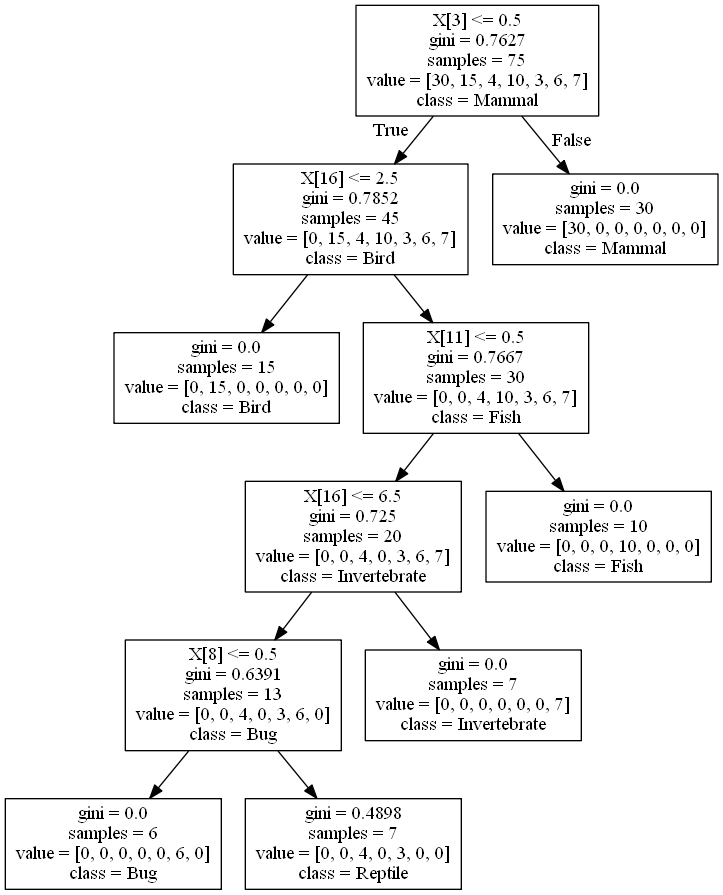

In [211]:
#![title](tree1.png)

from IPython.core.display import Image, display
display(Image('tree8.png', width=1900, height=2000, unconfined=True))

#tree.export_graphviz(clf,out_file='tree.dot', class_names=['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']) 

#export_graphviz(tree, out_file='test.dot', class_names=['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate'],
#impurity=False, filled=True)

########################  dot -Tpng tree.dot -o tree8.png #######################
